# Speech Data Exploration

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Initial exploration of the dataset
Here we can get a first idea of what the dataset looks like and what values are represented.
As can be seen the dataset consists of 354 speeches each being accompanied by the following columns:
- *ID*
- *Speaker*
- *Party*
- *Location*
- *Date*
- *Name of the speech*
- *Speech*

There are no NULL values in our dataset.  
The `.sample()` function gives a peak into the values of our dataset.  

In [ ]:
df = pd.read_csv('Code/speech_metadata.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           354 non-null    object
 1   speaker      354 non-null    object
 2   party        354 non-null    object
 3   location     354 non-null    object
 4   date         354 non-null    object
 5   name speech  354 non-null    object
 6   speech       354 non-null    object
dtypes: object(7)
memory usage: 19.5+ KB


,id,speaker,party,location,date,name speech,speech
count,354,354,354,354,354,354,354
unique,354,54,5,62,347,341,354
top,Conservative_0,Paddy Ashdown,Labour,London,1998,"Leader's speech, Brighton 1971",Thank you very much for that warm welcome. You...
freq,1,45,123,58,3,2,1


In [ ]:
df.sample(5)

,id,speaker,party,location,date,name speech,speech
178,Labour_178,Tony Blair,Labour,Blackpool,01/10/1996,"Leader's speech, Blackpool 1996","Diana, friends, colleagues, this year we meet ..."
13,Conservative_13,David Cameron,Conservative,Birmingham,01/10/2014,"Leader's speech, Birmingham 2014",I am so proud to stand here today as Prime Min...
304,Conservative_312,Stanley Baldwin,Conservative,Blackpool,07/10/1932,"Leader's speech, Blackpool 1932",Mr. Baldwin thanked Blackpool for the great we...
37,Conservative_37,David Cameron,Conservative,Shipley,28/05/2010,"""Transforming the British economy: Coalition s...",This is my first major speech as Prime Ministe...
132,Labour_132,Tony Blair,Labour,Bournemouth,28/09/1999,"Leader's speech, Bournemouth 1999",Today at the frontier of the new Millennium I ...


## Some exploratory queries & visualizations

### Speech counts

Below we see some visualizations related to the amount of speeches in the dataset.

We can see from the *first horizontal barplot* that the **Labour party** and **Conservative party** have the most speeches in the dataset (around 120 each), followed by the **Liberal Democrats** and the **Liberal party** with around 65 and 45 speeches respectively. The **SPD-Liberal Alliance** has only a few speeches in the dataset.
>***NOTE:*** The **Liberal** party merged with the **SPD-Liberal Alliance** to form the **Liberal Democrats** in 1988.

The *second horizontal* barplot looks at the 10 speakers that gave the most amount of speeches.  
Most of the speakers that have over 20 speeches appeared *after 1988*, which brings us to the final lineplot.  

In the *final lineplot* we can see that most speeches appeared around the *90s up until the 2010s* with a high peak around the *1995-2000* period.


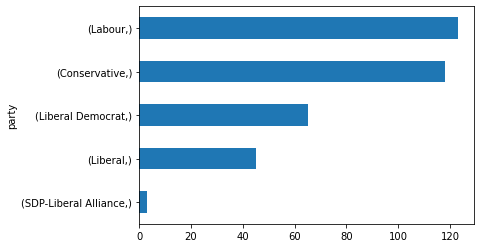

In [ ]:
#count speeches per party
df.value_counts(['party']).sort_values(ascending=True).plot(kind='barh');

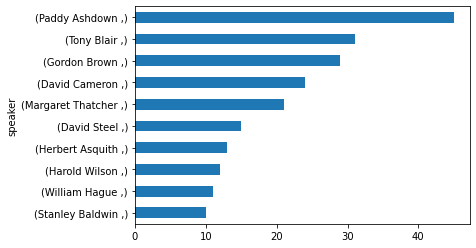

In [ ]:
#count speeches per speaker
df.value_counts(['speaker'])[:10].sort_values(ascending=True).plot(kind='barh');

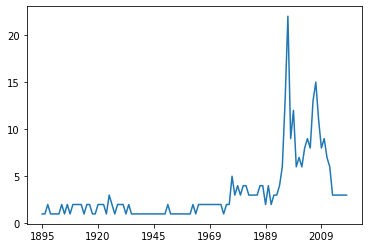

In [ ]:
#speeches per year
years = []
for date in df['date']:
    years.append(date[-4:])
df['year'] = years
df['year'].astype('int')
df['year'].value_counts().sort_index(ascending=True).plot.line();

### Location

This visualization looks at the cities which have been visited the by the parties.  
A significant number of speeches for both the *Labour* and the *Conservative party* have been given in **Blackpool**.  
This could be explained by the [Winter Gardens](https://www.wintergardensblackpool.co.uk/) which used to routinely host these political conferences.  
Additionally, seaside towns like **Brighton**, **Bournemouth** and **Blackpool**, have been the hosts of UK-wide political conferences partly because of the cheap accomodation outside the holiday season.  
More recently however, these events have been moved to more major cities which have purpose-built conference centres.  
>*[Source](https://en.wikipedia.org/wiki/Party_conference_season)*

Therefore we can see that more major cities like **London** and **Birmingham** also have a fair share of speeches attributed to them.

Another interesting observation is that **Birmingham** has no *Labour* speeches whereas the [Birmingham council has a majority of Labour councillers](https://www.birmingham.gov.uk/info/50068/how_the_council_works/882/political_composition_of_the_council).

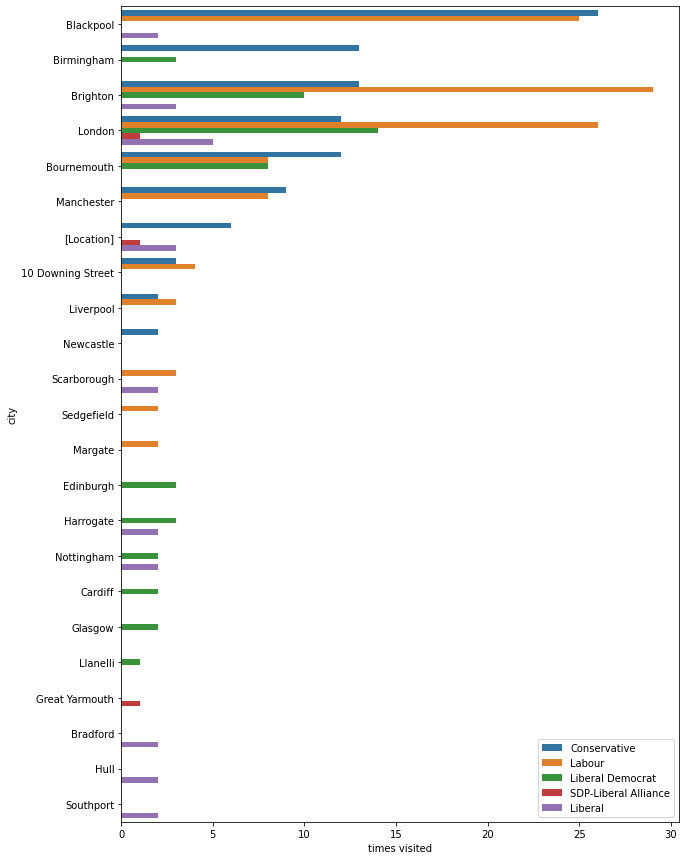

In [ ]:
#location speeches per party
parties = df['party'].unique()
party_location_dic = {}
for party in parties:
    partyloc = df.loc[df['party'] == party]
    partyloc = partyloc['location'].value_counts()[:10]
    party_location_dic[party] = dict(partyloc)

dft = pd.DataFrame([(i,j,party_location_dic[i][j])\
                    for i in party_location_dic.keys()\
                    for j in party_location_dic[i].keys()], columns=["party", "city", "times visited"])
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(x="times visited", y="city", hue="party" ,data=dft)
plt.legend(loc='lower right')
plt.show()

### Sentence length
The visualizations below will give an overview of the length of the speeches per party.  

Firstly we can observe ***the mean of the length of every speech per party.***  
Interestingly, the **Labour** and **Conservative** party have a similar average speech length.  
Additionally, the **SPD-Liberal Alliance** seems to have a relatively short speech length, however, this could be explained by the low number of speeches in the dataset.  
The **Liberal** party has the highest average speech length with **Liberal Democrats** having, comparatively speaking, a short average speech length.  


Secondly, the lineplot visualizes the fluctuation of ***average speech length over the years.***  
We can see some dips and peaks in the lineplot which is indicative of some of the outliers in the dataset.  
It is fair to say that most speeches range from around **15000 words** to around **35000 words**, which can be observed more clearly in the final part of this exploratory analysis.

In [ ]:
#average length of speech per party
df['speech'] = df['speech'].fillna('').astype('string')
df['length_in_words'] = df['speech'].apply(len)
df.groupby('party').mean('length_in_words')

,length_in_words
party,
Conservative,26133.000000
Labour,26521.162602
Liberal,30570.622222
Liberal Democrat,21201.492308
SDP-Liberal Alliance,14022.000000


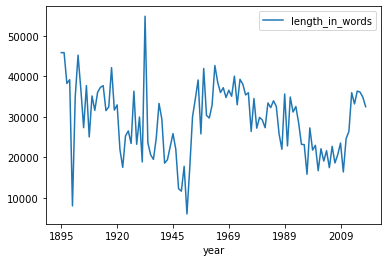

In [ ]:
#average speech length per year
df.groupby('year').mean('length_in_words').astype('int').plot.line();

### Boxplot with the length of speeches per party

In this boxplot we can see the differences between the length distribution per party.

At first glance, we can see from this boxplot that the greatest distinction is between Liberals and the other two parties.

- The ***Conservative party's*** *'shortest'* speech has around **50 words** and the *'longest'* speech has around **47000 words**.  
The majority of the speeches from the Conservative party have between **20000 (Q1) and 35000 words (Q3).**

- The ***Labour party's*** *'shortest'* speech has around **2000 words**, whereas the *'longest'* speech has over **51000 words**.  
The majority of the speeches from the Labour party have between **15000 (Q1) and 35000 words (Q3)**.

- The ***Liberal party's*** *'shortest'* speech has around **8000 words**, whereas the *'longest'* speech has around **55000 words**.<br> **NOTE:** Important to note here is that these speeches are outliers in the Liberal speeches.  
The majority of the speeches from the Liberals have between **25000 (Q1) and 35000 words (Q3)**.

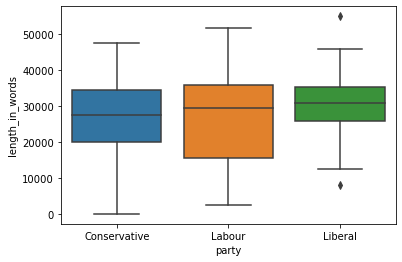

In [ ]:
df_three = df.loc[(df['party'] == 'Conservative') | (df['party']=='Labour') | (df['party']=='Liberal')]
sns.boxplot(x='party',y='length_in_words',data=df_three);

In [ ]:
print('Conservatives')
print(df_three.loc[df_three['party'] == 'Conservative'].describe())
print('Labour')
print(df_three.loc[df_three['party'] == 'Labour'].describe())
print('Liberal')
print(df_three.loc[df_three['party'] == 'Liberal'].describe())

Conservatives
       length_in_words
count       118.000000
mean      26133.000000
std       10955.536236
min          56.000000
25%       20025.250000
50%       27488.000000
75%       34431.750000
max       47490.000000
Labour
       length_in_words
count       123.000000
mean      26521.162602
std       12770.481760
min        2471.000000
25%       15515.000000
50%       29320.000000
75%       35934.000000
max       51549.000000
Liberal
       length_in_words
count        45.000000
mean      30570.622222
std        9148.845377
min        8051.000000
25%       25877.000000
50%       30924.000000
75%       35141.000000
max       54887.000000
